### А/В тестирование и приоритизация гипотез для увеличения выручки интернет-магазина 

**Часть 1. Приоритизация гипотез.**  
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  

*Задача:*  
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Определить, как изменилась приоритизация гипотез при применении RICE вместо ICE. 

**Часть 2. Анализ A/B-теста.**  
Проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

*Задача:*  
Проанализировать A/B-тест:  
- Построить график кумулятивной выручки по группам. 
- Построить график кумулятивного среднего чека по группам. 
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
- Построить график кумулятивного среднего количества заказов на посетителя по группам. 
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
- Построить точечный график количества заказов по пользователям. 
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. 
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

**Принять решение по результатам теста и объясните его. Варианты решений:**  
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Описание данных**  
<u>Файл /datasets/hypothesis.csv:</u>  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

<u>Файл /datasets/orders.csv:</u>  
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  

<u>Файл /datasets/visitors.csv:</u>  
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import math
import numpy as np

## Часть 1. Приоритизация гипотез.

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 1)
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним,почему так произошло.

После применения фреймворка RICE приоритизация гипотез изменилась:  
- Лидирующая по ICE гипотеза номер 8 перешла на пятую позицию, на смену ей встала гипотеза номер 7, которая ранее занимала третье место
- Также в рейтинге приоритизации поднялась гипотеза под номером 2 (с пятого на второе место)
- Нулевая гипотеза спустилась со второй позиции на третье
- Гипотеза 6 осталась без изменений, четвертое место - самая стабильная в топ-5  

Фреймворк RICE изменил приоритизацию гипотез из-за наличия значения Reach, которая имеет наибольшее значение у гипотезы номер 7, которая и заняла лидирующее положение.

## Часть 2. Анализ A/B-теста.

### Подготовим данные для аналиха и проверим их чистоту

In [7]:
visitors = pd.read_csv('visitors.csv')
display(visitors)
display(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [8]:
# переформатируем дату
visitors['date'] = pd.to_datetime(visitors['date'])

In [10]:
orders=pd.read_csv('orders.csv')
display(orders)
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

In [11]:
# приведем названия двух столбцов к змеиному регистру и переформатируем дату
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)
orders['date'] = pd.to_datetime(orders['date'])

In [12]:
# проверим не попал ли один и тот же посетитель в две группы одновременно в таблице orders
goroup_orders_a = orders[orders['group'] == 'A']
goroup_orders_b = orders[orders['group'] == 'B']

In [13]:
visitorid_A = set(goroup_orders_a['visitor_id'].unique())
visitorid_B = set(goroup_orders_b['visitor_id'].unique())
visitorid_A_and_B = (visitorid_A & visitorid_B)
len(visitorid_A_and_B)

58

58 посетителей попали в две группы одновременно. Выражаем благодарность специалисту, который проводил АВ тест и удаляем этих 58 страдальцев из тестирования, чтобы не портить исход нашего анализа недостоверными данными.

In [14]:
#проверяем удаление пользователей одновременно попавших в группу А и группу В
orders = orders[np.logical_not(orders['visitor_id'].isin(visitorid_A_and_B))].reset_index()
orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,1650,B
1,1,2804400009,3642806036,2019-08-15,730,B
2,3,3797467345,1196621759,2019-08-15,9759,B
3,4,2282983706,2322279887,2019-08-15,2308,B
4,5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...,...
1011,1191,3592955527,608641596,2019-08-14,16490,B
1012,1192,2662137336,3733762160,2019-08-14,6490,B
1013,1193,2203539145,370388673,2019-08-14,3190,A
1014,1194,1807773912,573423106,2019-08-14,10550,A


In [15]:
# группируем транзакции и посетителей, подсчитываем сумму выручки на каждую группу каждой даты
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transaction_id':'nunique','visitor_id':'nunique','revenue':'sum'}))
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()
orders_cumsum

,date,group,transaction_id,visitor_id,revenue
0,2019-08-01,A,23,19,142779
1,2019-08-01,B,17,17,59758
2,2019-08-02,A,42,37,234381
3,2019-08-02,B,40,39,221801
4,2019-08-03,A,66,61,346854
...,...,...,...,...,...
57,2019-08-29,B,510,506,4746610
58,2019-08-30,A,460,449,3311413
59,2019-08-30,B,531,527,4955833
60,2019-08-31,A,468,457,3364656


In [16]:
# считаем сумму визитов в каждой группе по дням
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# копируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()
visitors_cumsum

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845
...,...,...,...
57,2019-08-29,B,17708
58,2019-08-30,A,18037
59,2019-08-30,B,18198
60,2019-08-31,A,18736


In [17]:
# посчитаем сразу значения среднего чека и среднее количество заказов на посетителя
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cummulative['average_check'] = cummulative['revenue'] / cummulative['transaction_id']
cummulative['avg_trans'] = cummulative['transaction_id'] / cummulative['visitors']
cummulative

,date,group,transaction_id,visitor_id,revenue,visitors,average_check,avg_trans
0,2019-08-01,A,23,19,142779,719,6207.782609,0.031989
1,2019-08-01,B,17,17,59758,713,3515.176471,0.023843
2,2019-08-02,A,42,37,234381,1338,5580.500000,0.031390
3,2019-08-02,B,40,39,221801,1294,5545.025000,0.030912
4,2019-08-03,A,66,61,346854,1845,5255.363636,0.035772
...,...,...,...,...,...,...,...,...
57,2019-08-29,B,510,506,4746610,17708,9307.078431,0.028801
58,2019-08-30,A,460,449,3311413,18037,7198.723913,0.025503
59,2019-08-30,B,531,527,4955833,18198,9333.018832,0.029179
60,2019-08-31,A,468,457,3364656,18736,7189.435897,0.024979


### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

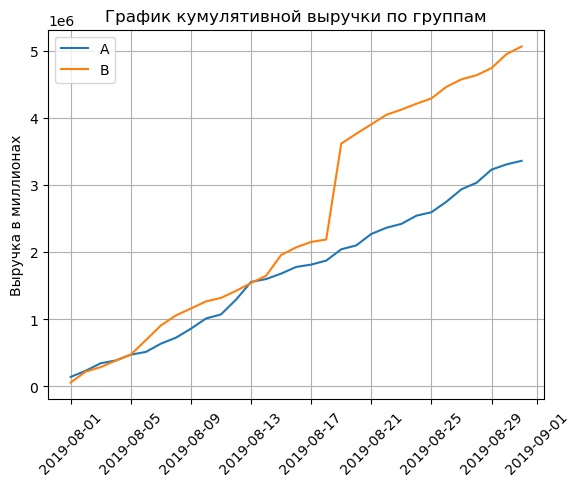

In [18]:
# датафреймы с кумулятивным количеством выручки по группам
cumulativeRevenueA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cumulativeRevenueB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка в миллионах')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show() 

Группа А имеет постепенный линейный рост без колебаний, а группа В фиксирует резкий скачек 18.08.2019, что может говорить о наличии единоразовой дорогой покупке в интернет-магазине.  

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

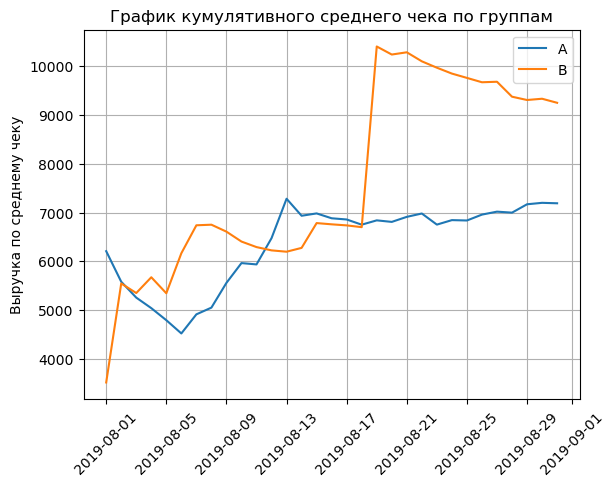

In [19]:
# датафреймы с кумулятивным количеством среднего чека по группам
cumulativeRevenueA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cumulativeRevenueB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['average_check'], label='A')
# Строим график среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['average_check'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Выручка по среднему чеку')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show() 

По группе В наблюдаем такую же ситуацию со средними чеками, как и с выручкой, 18.08.2019 резких скачок. Группа А плавна в своих изменениях - до 06.08.2019 выручка по среднему чеку снижалась, но потом плавно развернулась и отрасла выше начальной позиции, а 14.08.2019 выровнялась и поддерживает свое положение стабильно вокруг отметки в 7 тысяч рублей.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

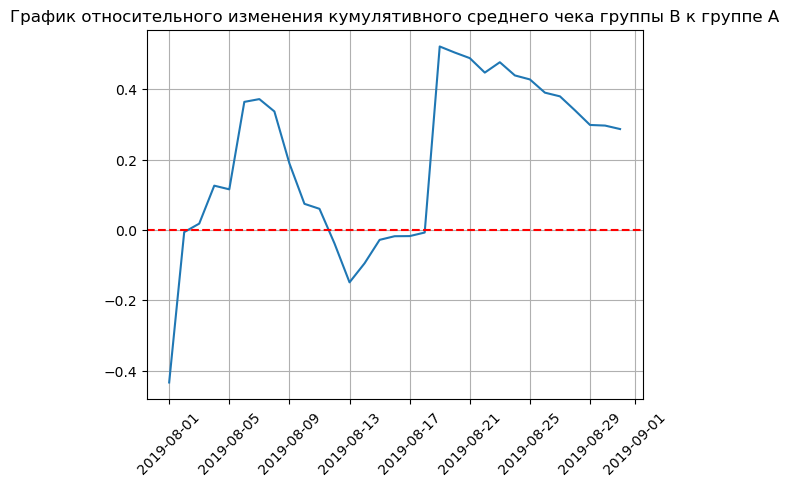

In [20]:
cumulativeRevenueA = cummulative[cummulative['group']=='A'][['date', 'average_check', 'transaction_id']]
cumulativeRevenueB = cummulative[cummulative['group'] == 'B'][['date', 'average_check', 'transaction_id']]

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['average_checkB']/mergedCumulativeRevenue['average_checkA']-1))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Полагаю, что выбросов тут больше, чем мы думали до этого графика, но пока что самым резким и заметным остается 18.08.2019, также интересно будет посмотреть ближе на 05.08.2019.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

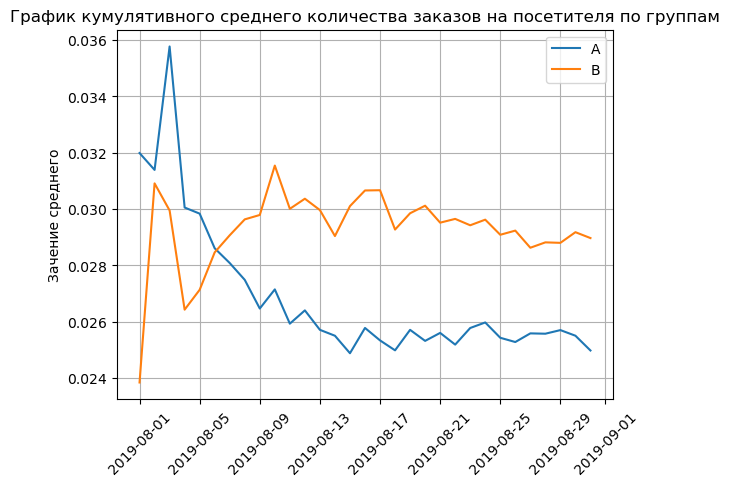

In [21]:
cumulativeRevenueA = cummulative[cummulative['group']=='A']
cumulativeRevenueB = cummulative[cummulative['group']=='B']

# строим графики
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['avg_trans'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['avg_trans'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Зачение среднего')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show() 

Среднее значение количества заказов группы А показывает стремительный рост в первые дни, но на 3 день резко снижается и колеблется на всем протяжении между значениями 0.025 и 0.026.  
Среднее значение количества заказов группы В также в первые дни показывает рост, после чего практически ожновременно с группой А падает, но на второй день падения разворачивается и начинает отрастать, после чего колеблется между значениями 0.029 и 0.030.  

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

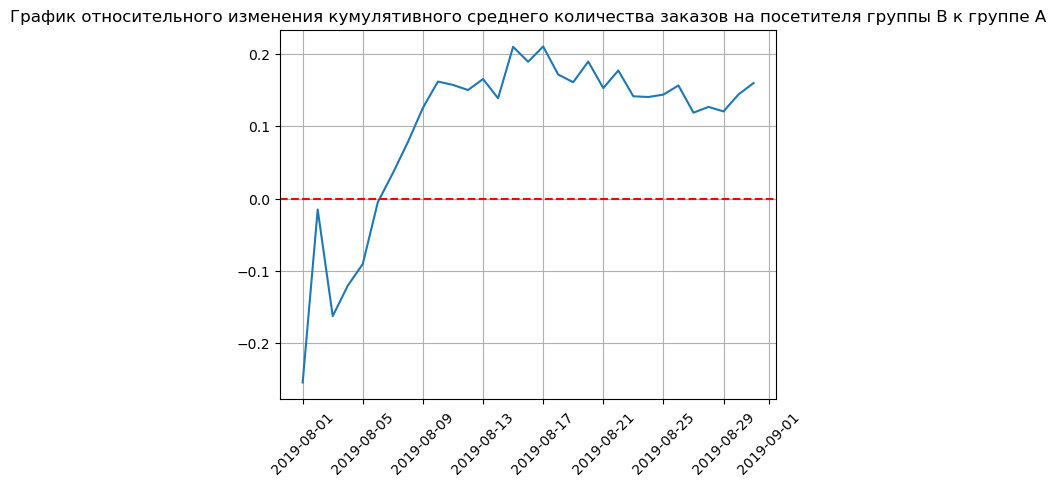

In [23]:
cumulativeRevenueA = cummulative[cummulative['group']=='A'][['date', 'avg_trans']]
cumulativeRevenueB = cummulative[cummulative['group'] == 'B'][['date', 'avg_trans']]

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['avg_transB']/mergedCumulativeRevenue['avg_transA']-1))
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.grid()
plt.show()

На основании имеющихся данных значение среднего количества заказов на посетителя группы В выше группы А. Смущает только интервал данных, короткий для глобальных выводов.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [24]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


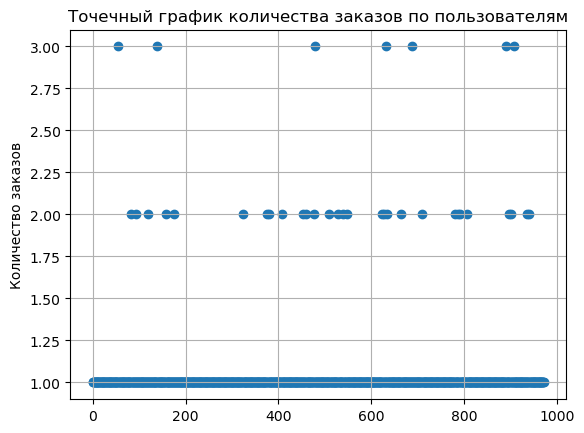

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.grid()
plt.show() 
plt.show()

Наибольшее число пользователей делает по 1 покупке, однако не мало тех, кто делает по 2 покупки и пока не ясно - считать их аномальными или нет.

### Посчитем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не больше 1% пользователей делали более 2-х покупок. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

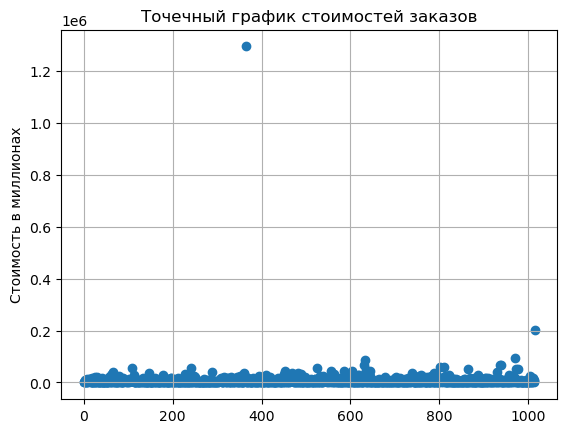

In [27]:
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость в миллионах')
plt.grid()
plt.show() 
plt.show()

Наблюдаем два явных выброса на значениях: более 1,2 млн. и 200.000.

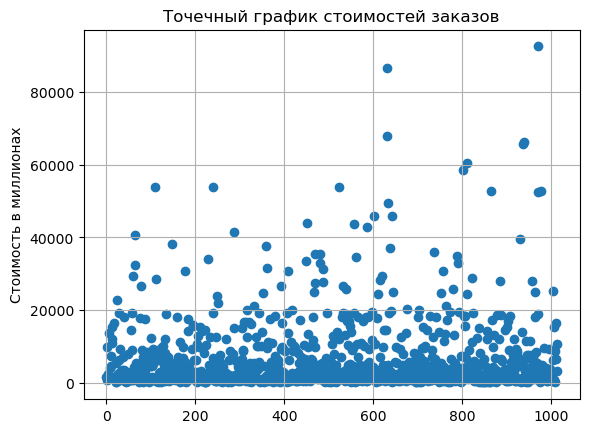

In [28]:
x_values = pd.Series(range(0,len(orders[orders['revenue'] < 200000])))
plt.scatter(x_values, orders[orders['revenue'] < 200000]['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость в миллионах')
plt.grid()
plt.show() 

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [29]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


Заказы со стоимостью выше 53.904 рублей делает 1% пользователей.  
Заказы со стоимостью выше 26.785 рублей делает 5% пользователей.  
Считаю аномальным показатель 1% пользователей в данном исследовании.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

**Сформулируем гипотезы.**  
**Нулевая:** Различий в среднем количестве заказов между группами нет.  
**Альтернативная:** Различия в среднем количестве заказов между группами есть.  
**Значение alpha**: 0.05

In [30]:
#Подготовим данные  
visitors_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a.columns = ['date', 'visitorsPerDateA']

visitors_a_cummulative = visitors_a.apply(
    lambda x: visitors_a[visitors_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_a_cummulative']

visitors_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b.columns = ['date', 'visitorsPerDateB']

visitors_b_cummulative = visitors_b.apply(
    lambda x: visitors_b[visitors_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_b_cummulative']

orders_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

orders_a_cummulative = orders_a.apply(
    lambda x: orders_a[orders_a['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

orders_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

orders_b_cummulative = orders_b.apply(
    lambda x: orders_b[orders_b['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    visitors_a.merge(
        orders_b, left_on='date', right_on='date', how='left'
    )
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a, left_on='date', right_on='date', how='left')
    .merge(visitors_b, left_on='date', right_on='date', how='left')
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  visitorsPerDateA_x  ordersPerDateB  revenuePerDateB  \
0 2019-08-01                 719              17            59758   
1 2019-08-02                 619              23           162043   
2 2019-08-03                 507              14            67049   
3 2019-08-04                 717              14            96890   
4 2019-08-05                 756              21            89908   

   visitors_a_cummulative  visitors_b_cummulative  visitorsPerDateA_y  \
0                     719                     713                 719   
1                    1338                    1294                 619   
2                    1845                    1803                 507   
3                    2562                    2573                 717   
4                    3318                    3280                 756   

   visitorsPerDateB  ordersCummulativeA  revenueCummulativeA  \
0               713                  23               142779   
1               58

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id'] 

pd.Series(0, index=np.arange(data['visitorsPerDateA_y'].sum() - len(ordersByUsersA['transaction_id'])), name='transaction_id')

[ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateA_y'].sum()-len(ordersByUsersA['transaction_id'])), name='transaction_id')]
sampleA = pd.concat([ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateA_y'].sum() - len(ordersByUsersA['transaction_id'])), name='transaction_id')],axis=0)

sampleB = pd.concat([ordersByUsersB['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])), name='transaction_id')],axis=0)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id']

sampleA = pd.concat(
    [
        ordersByUsersA['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA_y'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Прирост среднего количества заказов на посетителя',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value: 0.01102
Прирост среднего количества заказов на посетителя 0.160


P-value меньше 0.05 - нулевую гипотезу отвергаем.  
Анализ сырых данных говорит о том, что относительный прирост среднего группы В к группе А равен 16%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

**Сформулируем гипотезы.**  
**Нулевая:** Статистически значимых различий в среднем числе заказов между группами нет.  
**Альтернативная:** Статистически значимые различия в среднем числе заказов между группами есть.  
**Значение alpha**: 0.05

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего группы В к группе А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительный прирост среднего группы В к группе А: 0.287


P-value больше 0.05 - нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем - значимых отличий в среднем чеке между группами скорее нет. Анализ сырых данных говорит о том, что относительный прирост среднего группы В к группе А равен 28%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

**Сформулируем гипотезы.**  
**Нулевая:** Различий в среднем количестве заказов по "чистым" данным между группами нет.  
**Альтернативная:** Различия в среднем количестве заказов по "чистым" данным между группами есть.  
**Значение alpha**: 0.05

In [33]:
#Очистим данные
#Примим за аномальных пользователей тех, кто совершил более 2-х заказов или совершил заказ на сумму свыше 53 904 рублей. 
#Так мы уберем 1% пользователей с наибольшим числом заказов и от 1% заказов с наибольшей стоимостью.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

937    148427295
33     249864742
58     611059232
811    887908475
632    888512513
Name: visitor_id, dtype: int64
16


Обнаружено 16 аномальных пользователей.

In [34]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='transaction_id',
        ),
    ],
    axis=0,
)

print('P-value:','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего очищенной группы B:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.00702
Относительный прирост среднего очищенной группы B: 0.189


Различия в среднем количестве заказов по "чистым" данным между группами есть, нулевую гипотезу отвергаем.  
Группа В значительно лучше группы А.  
Разница между группами изменились, а именно увеличилась с 16% до 19%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

**Сформулируем гипотезы.**  
**Нулевая:** Статистически значимых различий в среднем числе заказов по "чистым" данным между группами нет.  
**Альтернативная:** Статистически значимые различия в среднем числе заказов по "чистым" данным между группами есть.  
**Значение alpha**: 0.05

In [35]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего очищенной группы В к группе А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.788
Относительный прирост среднего очищенной группы В к группе А: -0.032


Статистически значимых различий в среднем числе заказов по "чистым" данным между группами нет.  
Различия по значению среднего чека стало меньше на 3,2%.  
После удаления аномальных значений дисперсия немного снизилась.

## Выводы исследования:

Считаю, что исследование можно завершить и признать группу В победителем, так как:
- Есть статистически значимое различие по значению среднего количества заказов на посетителя между группами как по "сырым" данным, так и после удаления аномалий. Группа В показывает результаты выше группы А.
- По сырым данным нет статистически значимого различия по среднему чеку между группами. Так же как и после удаления аномалий статистически значимых различий не обнаружено.
- График кумулятивного среднего количества заказов на посетителя по группам сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту и зафиксировались около среднего значения.  